In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram

In [2]:
Control_WT_T0_T1 = pd.read_csv('../figures/direct/Control_WT_01/top25_pathways.csv', index_col=0, sep=',').set_index('Pathways').T
Control_WT_T0_T2 = pd.read_csv('../figures/direct/Control_WT_02/top25_pathways.csv', index_col=0,sep=',').set_index('Pathways').T
Control_MUT_T0_T1 = pd.read_csv('../figures/direct/Control_MUT_01/top25_pathways.csv', index_col=0,sep=',').set_index('Pathways').T
Control_MUT_T0_T2 = pd.read_csv('../figures/direct/Control_MUT_02/top25_pathways.csv', index_col=0,sep=',').set_index('Pathways').T
Control_WT_T0_T1 = Control_WT_T0_T1.rename(index={Control_WT_T0_T1.index[0]: "Control_WT_T0_T1"})
Control_WT_T0_T2 = Control_WT_T0_T2.rename(index={Control_WT_T0_T2.index[0]: "Control_WT_T0_T2"})
Control_MUT_T0_T1 = Control_MUT_T0_T1.rename(index={Control_MUT_T0_T1.index[0]: "Control_MUT_T0_T1"})
Control_MUT_T0_T2 = Control_MUT_T0_T2.rename(index={Control_MUT_T0_T2.index[0]: "Control_MUT_T0_T2"})
Control_WT_T0_T1

Pathways,EGFR,PI3K,Androgen,MAPK,p53,JAK-STAT,TNFa,NFkB,Trail,WNT,VEGF,TGFb,Hypoxia,Estrogen
Control_WT_T0_T1,5.854388,-4.559085,-2.321027,-2.212727,2.012333,-1.924857,-1.346481,1.220879,0.97529,-0.919984,-0.913652,-0.687877,-0.509329,-0.48733


In [3]:
Control_WT_T0_T2

Pathways,PI3K,JAK-STAT,EGFR,Hypoxia,MAPK,TGFb,Trail,Androgen,WNT,NFkB,Estrogen,VEGF,p53,TNFa
Control_WT_T0_T2,-4.97823,-2.564869,2.327413,-2.223845,-1.327341,-1.157118,1.005743,-0.986707,0.948082,0.906131,0.824126,-0.760094,0.505496,-0.5008


In [4]:
Control_MUT_T0_T1

Pathways,JAK-STAT,TNFa,Hypoxia,MAPK,Estrogen,TGFb,p53,NFkB,Androgen,WNT,PI3K,VEGF,Trail,EGFR
Control_MUT_T0_T1,6.480778,2.759889,1.765774,1.764932,-1.660198,-1.533572,-1.244843,-1.09003,-1.043159,-0.753446,-0.32372,0.30431,0.27266,0.126262


In [5]:
Control_MUT_T0_T2

Pathways,JAK-STAT,PI3K,EGFR,TNFa,Androgen,Estrogen,WNT,TGFb,NFkB,Trail,VEGF,p53,Hypoxia,MAPK
Control_MUT_T0_T2,9.095067,-4.915667,3.325178,3.120081,-2.706134,-2.524694,-2.219385,-2.007071,-1.607708,1.539802,1.258025,1.21708,0.388478,-0.217277


In [6]:
all_dfs =[Control_WT_T0_T1,Control_WT_T0_T2,Control_MUT_T0_T1,Control_MUT_T0_T2]

In [7]:
combined_df = pd.concat(all_dfs, ignore_index=False)
#combined_df.index.name=("Pathways")
combined_df = combined_df.rename(columns={"TFs": "Pathways"})
combined_df

Pathways,EGFR,PI3K,Androgen,MAPK,p53,JAK-STAT,TNFa,NFkB,Trail,WNT,VEGF,TGFb,Hypoxia,Estrogen
Control_WT_T0_T1,5.854388,-4.559085,-2.321027,-2.212727,2.012333,-1.924857,-1.346481,1.220879,0.975290,-0.919984,-0.913652,-0.687877,-0.509329,-0.487330
Control_WT_T0_T2,2.327413,-4.978230,-0.986707,-1.327341,0.505496,-2.564869,-0.500800,0.906131,1.005743,0.948082,-0.760094,-1.157118,-2.223845,0.824126
Control_MUT_T0_T1,0.126262,-0.323720,-1.043159,1.764932,-1.244843,6.480778,2.759889,-1.090030,0.272660,-0.753446,0.304310,-1.533572,1.765774,-1.660198
Control_MUT_T0_T2,3.325178,-4.915667,-2.706134,-0.217277,1.217080,9.095067,3.120081,-1.607708,1.539802,-2.219385,1.258025,-2.007071,0.388478,-2.524694


<Figure size 1600x600 with 0 Axes>

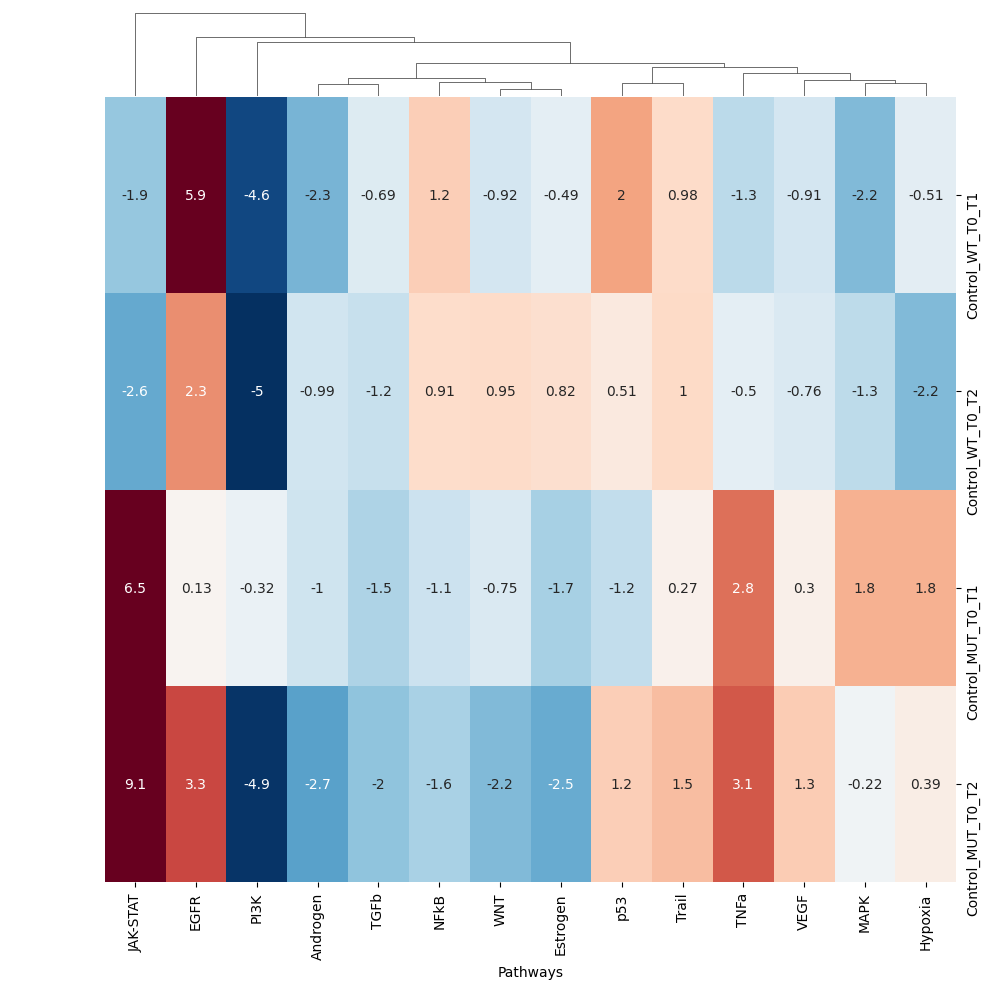

In [8]:
plt.figure(figsize=(16, 6))

# Create the heatmap with hierarchical clustering on the top
Z = linkage(combined_df.T, 'ward')
ax = sns.clustermap(
    combined_df,
    cmap='RdBu_r',
    annot=True,
    vmin=-5,
    vmax=5,
    row_cluster=False,  # Disable row clustering
    col_cluster=True,   # Enable column clustering
    dendrogram_ratio=(0.1),
    #cbar_pos=(0.02, 0.7, 0.05, 0.2)
    cbar_pos=None
)

#plt.title('Pathway Activity')
plt.savefig("../figures/direct/compare/Control_pathway_heatmap.png")
plt.show()